In [1]:
import tensorflow as tf

In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]

In [4]:
gpus = tf.config.experimental.list_physical_devices("GPU")

In [5]:
if gpus:
    try:
        tf.config.experimental.set_visible_devices([gpus[1], gpus[2]], "GPU")
        logic_gpus = tf.config.experimental.list_logical_devices("GPU")
        print(len(logic_gpus))
    except RuntimeError as e:
        print(e)

2


In [6]:
tf.executing_eagerly()

True

In [7]:
os.path.basename

<function posixpath.basename(p)>

In [8]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

In [9]:
train_data = tf.keras.utils.get_file(os.path.basename(url), origin=url)

In [10]:
print(train_data)

/home/rrjin/.keras/datasets/iris_training.csv


```
120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
......
```
第一行是表头，其中包含数据集信息:
- 共有 120 个样本。每个样本都有四个特征和一个标签名称，标签名称有三种可能
- 后面的行是数据记录，每个样本各占一行，其中： 
    - 前四个字段是特征: 这四个字段代表的是样本的特点。在此数据集中，这些字段存储的是代表花卉测量值的浮点数。
    - 最后一列是标签:即我们想要预测的值。对于此数据集，该值为 0、1 或 2 中的某个整数值（每个值分别对应一个花卉名称）。

In [11]:
train_data

'/home/rrjin/.keras/datasets/iris_training.csv'

In [12]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_names = column_names[-1]

In [13]:
feature_names, label_names

(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 'species')

In [14]:
tmp = tf.data.experimental.make_csv_dataset(train_data, 32)

In [15]:
tmp

<PrefetchDataset shapes: OrderedDict([(120, (32,)), (4, (32,)), (setosa, (32,)), (versicolor, (32,)), (virginica, (32,))]), types: OrderedDict([(120, tf.float32), (4, tf.float32), (setosa, tf.float32), (versicolor, tf.float32), (virginica, tf.int32)])>

In [16]:
tmp = tf.data.experimental.make_csv_dataset(file_pattern=train_data, batch_size=32, column_names=column_names)

In [17]:
tmp

<PrefetchDataset shapes: OrderedDict([(sepal_length, (32,)), (sepal_width, (32,)), (petal_length, (32,)), (petal_width, (32,)), (species, (32,))]), types: OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32), (species, tf.int32)])>

In [18]:
train_dataset = tf.data.experimental.make_csv_dataset(file_pattern=train_data, batch_size=32, column_names=column_names, label_name=label_names, num_epochs=1)

In [19]:
train_dataset

<PrefetchDataset shapes: (OrderedDict([(sepal_length, (None,)), (sepal_width, (None,)), (petal_length, (None,)), (petal_width, (None,))]), (None,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [20]:
next(iter(train_dataset))

(OrderedDict([('sepal_length',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([5.9, 6.8, 5.8, 5.7, 6.7, 6. , 5.5, 7.7, 4.8, 4.8, 6.5, 4.7, 7.9,
                      6.5, 4.7, 5. , 6.1, 5.6, 6.6, 6.5, 6.1, 4.6, 6.9, 7.2, 6.3, 6.7,
                      5. , 5.5, 6.2, 6. , 6.3, 6.5], dtype=float32)>),
              ('sepal_width',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([3. , 3.2, 2.8, 2.8, 3.1, 2.2, 2.4, 2.8, 3. , 3.4, 3. , 3.2, 3.8,
                      3.2, 3.2, 3.4, 2.6, 2.9, 3. , 3. , 2.8, 3.2, 3.1, 3. , 3.4, 3. ,
                      3.6, 3.5, 2.2, 2.9, 2.5, 2.8], dtype=float32)>),
              ('petal_length',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([5.1, 5.9, 5.1, 4.5, 5.6, 5. , 3.7, 6.7, 1.4, 1.6, 5.5, 1.3, 6.4,
                      5.1, 1.6, 1.5, 5.6, 3.6, 4.4, 5.2, 4.7, 1.4, 4.9, 5.8, 5.6, 5.2,
                      1.4, 1.3, 4.5, 4.5, 5. , 4.6], dtype

In [21]:
featurs, labels = next(iter(train_dataset))

In [22]:
%matplotlib inline

Text(0, 0.5, 'sepal_length')

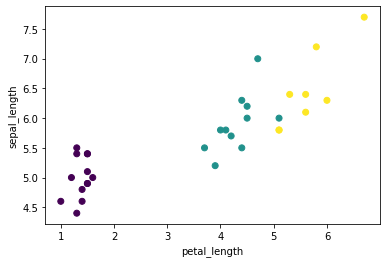

In [23]:
plt.scatter(featurs["petal_length"], featurs["sepal_length"], c=labels)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")

In [24]:
type(featurs)

collections.OrderedDict

In [25]:
type(featurs["petal_length"])

tensorflow.python.framework.ops.EagerTensor

In [26]:
featurs.values()

odict_values([<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([7.2, 5.5, 5. , 6.3, 4.6, 6. , 6.4, 5.4, 4.6, 4.4, 5.7, 7. , 5.8,
       5.5, 4.9, 6.4, 5.8, 5.8, 5. , 5.4, 6.2, 5.1, 7.7, 6.3, 6.1, 5.2,
       5.5, 4.8, 5.4, 5.8, 6. , 4.9], dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 3.5, 3.2, 2.3, 3.4, 2.7, 2.8, 3.9, 3.6, 3. , 2.9, 3.2, 2.7,
       2.4, 3.1, 3.2, 2.6, 2.7, 3.4, 3.4, 2.2, 3.8, 2.8, 3.3, 2.6, 2.7,
       2.6, 3. , 3.7, 2.7, 2.9, 3.1], dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.8, 1.3, 1.2, 4.4, 1.4, 5.1, 5.6, 1.3, 1. , 1.3, 4.2, 4.7, 4.1,
       3.7, 1.5, 5.3, 4. , 5.1, 1.6, 1.5, 4.5, 1.5, 6.7, 6. , 5.6, 3.9,
       4.4, 1.4, 1.5, 5.1, 4.5, 1.5], dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.6, 0.2, 0.2, 1.3, 0.3, 1.6, 2.2, 0.4, 0.2, 0.2, 1.3, 1.4, 1. ,
       1. , 0.1, 2.3, 1.2, 1.9, 0.4, 0.4, 1.5, 0.3, 2. , 2.5, 1.4, 1.4,
       1.2, 0.3, 0.2, 1.9, 1.5, 0.1], dtype=float32)>])

In [27]:
list(featurs.values())

[<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([7.2, 5.5, 5. , 6.3, 4.6, 6. , 6.4, 5.4, 4.6, 4.4, 5.7, 7. , 5.8,
        5.5, 4.9, 6.4, 5.8, 5.8, 5. , 5.4, 6.2, 5.1, 7.7, 6.3, 6.1, 5.2,
        5.5, 4.8, 5.4, 5.8, 6. , 4.9], dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([3. , 3.5, 3.2, 2.3, 3.4, 2.7, 2.8, 3.9, 3.6, 3. , 2.9, 3.2, 2.7,
        2.4, 3.1, 3.2, 2.6, 2.7, 3.4, 3.4, 2.2, 3.8, 2.8, 3.3, 2.6, 2.7,
        2.6, 3. , 3.7, 2.7, 2.9, 3.1], dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([5.8, 1.3, 1.2, 4.4, 1.4, 5.1, 5.6, 1.3, 1. , 1.3, 4.2, 4.7, 4.1,
        3.7, 1.5, 5.3, 4. , 5.1, 1.6, 1.5, 4.5, 1.5, 6.7, 6. , 5.6, 3.9,
        4.4, 1.4, 1.5, 5.1, 4.5, 1.5], dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1.6, 0.2, 0.2, 1.3, 0.3, 1.6, 2.2, 0.4, 0.2, 0.2, 1.3, 1.4, 1. ,
        1. , 0.1, 2.3, 1.2, 1.9, 0.4, 0.4, 1.5, 0.3, 2. , 2.5, 1.4, 1.4,
        1.2, 0.3, 0.2, 1.9, 1.5, 0.1], dtype=float32)>]

In [28]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [29]:
train_dataset = train_dataset.map(pack_features_vector)

In [30]:
featurs, labels = next(iter(train_dataset))

In [31]:
featurs

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[6.3, 3.3, 6. , 2.5],
       [4.6, 3.1, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.9, 1.7, 0.4],
       [4.4, 3.2, 1.3, 0.2],
       [6.9, 3.1, 4.9, 1.5],
       [4.8, 3.1, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [7.7, 2.8, 6.7, 2. ],
       [6.8, 2.8, 4.8, 1.4],
       [6. , 2.2, 5. , 1.5],
       [5.2, 2.7, 3.9, 1.4],
       [6.3, 2.7, 4.9, 1.8],
       [6.1, 2.8, 4.7, 1.2],
       [6.8, 3.2, 5.9, 2.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.8, 2.7, 5.1, 1.9],
       [4.9, 3. , 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [7.2, 3.6, 6.1, 2.5],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.5, 1.3, 0.3],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [5.1, 2.5, 3. , 1.1],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.8, 5.6, 2.1],
       [6.5, 2.8, 4.6, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [4.7, 3.2, 1.3, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [6.7, 3. , 5. , 1.7]], dtype=float32)>

In [32]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 1, 1, 2, 2, 1, 1, 0, 2, 1], dtype=int32)>

In [253]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [254]:
model

In [255]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.48583364, -0.27963063,  0.4059832 ,  0.41009068, -0.38431302,
          0.5740373 ,  0.32777888,  0.43467665, -0.00666279,  0.41317892],
        [ 0.34318346, -0.08401531,  0.5129247 ,  0.5133873 , -0.07667369,
          0.34674037, -0.30142072,  0.07836121, -0.33085677,  0.28947967],
        [-0.6330599 ,  0.25135458, -0.06979781,  0.64380693,  0.13692975,
          0.46354735, -0.5310525 , -0.6288253 , -0.2242209 , -0.01236618],
        [-0.24690938, -0.09473622, -0.240405  , -0.02313018,  0.01540387,
          0.45980525,  0.5946387 , -0.48374104, -0.5226523 ,  0.11662263]],
       dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(10, 20) dtype=float32, numpy=
 array([[ 0.28517842, -0.18135211,  0.38630235,  0.21115619,  0.29159296,
          0.06226248,  0.4232486 , -0

In [256]:
predictions = model(featurs)

In [257]:
predictions

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[ 6.9119105 ,  2.6698966 , -0.1354692 ],
       [ 4.240418  ,  1.951775  ,  0.51075923],
       [ 4.372317  ,  2.0205903 ,  0.5399184 ],
       [ 5.1052637 ,  2.3597536 ,  0.6383884 ],
       [ 4.118355  ,  1.918239  ,  0.52021706],
       [ 6.642336  ,  2.717887  ,  0.16070318],
       [ 4.3740497 ,  2.005193  ,  0.5214418 ],
       [ 4.275879  ,  1.9779978 ,  0.5939832 ],
       [ 7.5628004 ,  2.9232423 , -0.12908244],
       [ 6.4116697 ,  2.6149309 ,  0.14579844],
       [ 5.8203716 ,  2.273732  , -0.05226564],
       [ 5.269702  ,  2.14813   ,  0.10531473],
       [ 6.1929336 ,  2.4748008 ,  0.0513854 ],
       [ 6.012376  ,  2.4253662 ,  0.06455517],
       [ 7.0589223 ,  2.7674732 , -0.05211091],
       [ 4.9653835 ,  2.3433526 ,  0.7471534 ],
       [ 6.0243144 ,  2.354079  , -0.06204939],
       [ 4.3087664 ,  1.9975226 ,  0.58788264],
       [ 4.8247    ,  2.2484338 ,  0.61535966],
       [ 7.527383  ,  2.9776268 , -0.00

In [258]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[9.8498082e-01, 1.4162649e-02, 8.5662305e-04],
       [8.8856906e-01, 9.0104438e-02, 2.1326570e-02],
       [8.9536560e-01, 8.5242964e-02, 1.9391479e-02],
       [9.2962831e-01, 5.9696577e-02, 1.0675056e-02],
       [8.7860721e-01, 9.7341187e-02, 2.4051566e-02],
       [9.7915924e-01, 1.9341350e-02, 1.4993948e-03],
       [8.9701229e-01, 8.3949290e-02, 1.9038472e-02],
       [8.8837820e-01, 8.9256696e-02, 2.2365101e-02],
       [9.8998290e-01, 9.5651839e-03, 4.5194471e-04],
       [9.7623456e-01, 2.1910457e-02, 1.8549019e-03],
       [9.6933335e-01, 2.7937474e-02, 2.7290983e-03],
       [9.5255846e-01, 4.1996215e-02, 5.4453621e-03],
       [9.7424978e-01, 2.3654066e-02, 2.0961862e-03],
       [9.7059816e-01, 2.6867110e-02, 2.5347420e-03],
       [9.8570609e-01, 1.3489466e-02, 8.0438663e-04],
       [9.1964179e-01, 6.6816710e-02, 1.3541431e-02],
       [9.7300476e-01, 2.4782892e-02, 2.2122834e-03],
       [8.9019412e-01, 8.8251948e

In [259]:
tmp = tf.constant([[2,20,30,3,6],[3,11,16,1,8],[14,45,23,5,27]])

In [260]:
tf.math.argmax(tmp)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 2, 0, 2, 2])>

In [261]:
tf.math.argmax(tmp, axis=1)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 2, 1])>

In [262]:
tf.math.argmax(tmp, axis=0)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 2, 0, 2, 2])>

In [263]:
print("Prediction: {}".format(tf.math.argmax(tf.nn.softmax(predictions), axis=1)))
print("Lables: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Lables: [2 0 0 0 0 1 0 0 2 1 2 1 2 1 2 0 2 0 0 2 2 0 0 1 1 2 2 1 1 0 2 1]


In [264]:
tf.convert_to_tensor([[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.9 , 0.05, 0.05],
       [0.5 , 0.89, 0.6 ],
       [0.05, 0.01, 0.94]], dtype=float32)>

In [265]:
tf.convert_to_tensor([0, 1, 2])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [266]:
tmp = tf.keras.losses.SparseCategoricalCrossentropy()

In [267]:
tmp

In [268]:
tf.keras.losses.SparseCategoricalCrossentropy()

In [269]:
tmp(tf.convert_to_tensor([0, 1, 2]), tf.convert_to_tensor([[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.32396814>

In [270]:
tmp = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [271]:
tmp(tf.convert_to_tensor([0, 1, 2]), tf.convert_to_tensor([[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.6981444>

In [272]:
tf.nn.softmax([[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]], axis=1)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.539133  , 0.23043351, 0.23043351],
       [0.2791618 , 0.41231665, 0.30852154],
       [0.22748373, 0.21856394, 0.55395234]], dtype=float32)>

In [273]:
tf.nn.softmax([[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.539133  , 0.23043351, 0.23043351],
       [0.2791618 , 0.41231665, 0.30852154],
       [0.22748373, 0.21856394, 0.55395234]], dtype=float32)>

In [274]:
tf.nn.softmax([[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]], axis=0)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.47670466, 0.23380022, 0.19348414],
       [0.31954467, 0.5415671 , 0.33535698],
       [0.20375068, 0.22463277, 0.47115895]], dtype=float32)>

In [275]:
tf.math.log(tf.constant([0, 0.5, 1, 5]))

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([      -inf, -0.6931472,  0.       ,  1.609438 ], dtype=float32)>

In [276]:
tmp2 = tf.keras.losses.SparseCategoricalCrossentropy()

In [277]:
tmp2(tf.convert_to_tensor([0, 1, 2]), tf.nn.softmax([[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]], axis=1))

<tf.Tensor: shape=(), dtype=float32, numpy=0.69814444>

In [278]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [279]:
def loss(model, data_in, label):
    out = model(data_in)
    return loss_object(y_true=label, y_pred=out)

In [280]:
loss(model, featurs, labels)

<tf.Tensor: shape=(), dtype=float32, numpy=3.3552456>

In [281]:
def grad(model, inputs, targets):
    with tf.GradientTape() as t:
        loss_value = loss(model, inputs, targets)
    return loss_value, t.gradient(loss_value, model.trainable_variables)

In [282]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [283]:
loss_value, grads = grad(model, featurs, labels)

In [284]:
model.trainable_variables

[<tf.Variable 'dense_6/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.48583364, -0.27963063,  0.4059832 ,  0.41009068, -0.38431302,
          0.5740373 ,  0.32777888,  0.43467665, -0.00666279,  0.41317892],
        [ 0.34318346, -0.08401531,  0.5129247 ,  0.5133873 , -0.07667369,
          0.34674037, -0.30142072,  0.07836121, -0.33085677,  0.28947967],
        [-0.6330599 ,  0.25135458, -0.06979781,  0.64380693,  0.13692975,
          0.46354735, -0.5310525 , -0.6288253 , -0.2242209 , -0.01236618],
        [-0.24690938, -0.09473622, -0.240405  , -0.02313018,  0.01540387,
          0.45980525,  0.5946387 , -0.48374104, -0.5226523 ,  0.11662263]],
       dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(10, 20) dtype=float32, numpy=
 array([[ 0.28517842, -0.18135211,  0.38630235,  0.21115619,  0.29159296,
          0.06226248,  0.4232486 , -0

In [285]:
print("Step {}, Initial Loss: {}".format(optimizer.iterations.numpy(), loss_value.numpy()))

Step 0, Initial Loss: 3.355245590209961


In [286]:
optimizer.apply_gradients(zip(grads, model.trainable_variables))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [287]:
print("Step {}, Initial Loss: {}".format(optimizer.iterations.numpy(), loss(model, featurs, labels)))

Step 1, Initial Loss: 2.536689519882202


In [288]:
def cal_accuracy(y_true, y_pre):
    return tf.reduce_mean(tf.cast(y_true == y_pre, dtype=tf.float32))

In [289]:
test_y_pre = model(featurs)

In [290]:
test_y_pre = tf.math.argmax(tf.nn.softmax(test_y_pre, axis=1), axis=1)

In [291]:
test_y_pre

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [292]:
test_y_pre = tf.cast(test_y_pre, dtype=tf.int32)

In [293]:
test_y_pre == labels

<tf.Tensor: shape=(32,), dtype=bool, numpy=
array([False,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False])>

In [294]:
tf.reduce_sum(tf.cast(test_y_pre == labels, dtype=tf.int32))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [295]:
cal_accuracy(labels, test_y_pre)

<tf.Tensor: shape=(), dtype=float32, numpy=0.375>

In [296]:
cal_accuracy(labels, test_y_pre).numpy()

0.375

In [297]:
0 + cal_accuracy(labels, test_y_pre).numpy()

0.375

In [298]:
train_loss_result1 = []
train_loss_result2 = []

train_accuracy_result1 = []
train_accuracy_result2 = []

In [299]:
epochs = 201

In [300]:
for epoch in range(epochs):
    epoch_loss_avg_value = 0.0
    epoch_accuracy_value = 0.0
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    cnt = 0
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        epoch_loss_avg(loss_value)
        epoch_loss_avg_value += loss_value.numpy()
        
        out = model(x)
        epoch_accuracy(y, out)
#         print("Temp accuracy:{}".format(epoch_accuracy(y, out)))
        
        out = tf.nn.softmax(out, axis=1)
        
        out = tf.math.argmax(out, axis=1)
        
        out = tf.cast(out, dtype=tf.int32)
        cnt += 1

        epoch_accuracy_value += cal_accuracy(y, out).numpy()
#         print("My accuracy:{}".format(epoch_accuracy_value/cnt))
        
    epoch_loss_avg_value /= cnt
    epoch_accuracy_value /= cnt
    
    train_loss_result1.append(epoch_loss_avg_value)
    train_accuracy_result1.append(epoch_accuracy_value)
    
    train_loss_result2.append(epoch_loss_avg.result())
    train_accuracy_result2.append(epoch_accuracy.result())
    
    if epoch % 10 == 0 :
        print("Epoch: {}, Loss: {}, Accuracy:{}".format(epoch, epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch: 0, Loss: 1.9915419816970825, Accuracy:0.28333333134651184
Epoch: 10, Loss: 0.48162907361984253, Accuracy:0.7083333134651184
Epoch: 20, Loss: 0.2931211590766907, Accuracy:0.9666666388511658
Epoch: 30, Loss: 0.19199475646018982, Accuracy:0.9666666388511658
Epoch: 40, Loss: 0.11572553217411041, Accuracy:0.9750000238418579
Epoch: 50, Loss: 0.1001109704375267, Accuracy:0.9750000238418579
Epoch: 60, Loss: 0.07867152988910675, Accuracy:0.9750000238418579
Epoch: 70, Loss: 0.07197143137454987, Accuracy:0.9916666746139526
Epoch: 80, Loss: 0.07168988883495331, Accuracy:0.9833333492279053
Epoch: 90, Loss: 0.07051253318786621, Accuracy:0.9750000238418579
Epoch: 100, Loss: 0.05417397990822792, Accuracy:0.9833333492279053
Epoch: 110, Loss: 0.06697042286396027, Accuracy:0.9833333492279053
Epoch: 120, Loss: 0.0774005800485611, Accuracy:0.9666666388511658
Epoch: 130, Loss: 0.04918685182929039, Accuracy:0.9833333492279053
Epoch: 140, Loss: 0.048978909850120544, Accuracy:0.9833333492279053
Epoch: 1

In [301]:
train_accuracy_result1[:10]

[0.28125,
 0.34375,
 0.3489583358168602,
 0.5885416716337204,
 0.4348958358168602,
 0.7109375,
 0.7005208283662796,
 0.703125,
 0.8723958283662796,
 0.703125]

In [302]:
train_accuracy_result2[:10]

[<tf.Tensor: shape=(), dtype=float32, numpy=0.28333333>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.59166664>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.43333334>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7083333>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7083333>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>]

In [303]:
out = model(featurs)

In [305]:
tmp = tf.keras.metrics.SparseCategoricalAccuracy()

In [306]:
tmp(labels, out)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [307]:
tmp(labels, out[:, ::-1]),tmp(labels, out[:, ::-1])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.640625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5208333>)

In [308]:
tmp_out = out[:, ::-1]

In [309]:
tmp_out = tf.nn.softmax(tmp_out, axis=1)
tmp_out = tf.math.argmax(tmp_out, axis=1)

In [310]:
tmp_out

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 1, 1, 0, 0, 1, 1, 2, 0, 1])>

In [311]:
cal_accuracy(labels, tf.cast(tmp_out, dtype=tf.int32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.28125>

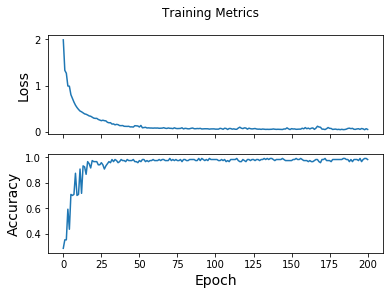

In [314]:
fig, axes = plt.subplots(2, sharex=True)
fig.suptitle("Training Metrics")
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_result2)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_result2)
plt.show()

In [315]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

In [317]:
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url), origin=test_url)

In [318]:
test_fp

'/home/rrjin/.keras/datasets/iris_test.csv'

In [324]:
test_dataset = tf.data.experimental.make_csv_dataset(file_pattern=test_fp, batch_size=32, column_names=column_names, label_name="species", num_epochs=1, shuffle=False)

In [325]:
next(iter(test_dataset))

(OrderedDict([('sepal_length',
               <tf.Tensor: shape=(30,), dtype=float32, numpy=
               array([5.9, 6.9, 5.1, 6. , 5.5, 6.2, 5.5, 6.3, 5.6, 6.7, 7.1, 4.3, 5.6,
                      5.5, 6. , 5.1, 5.7, 4.8, 5.1, 5.7, 5.4, 5.6, 6.3, 6.3, 5.8, 6.1,
                      5.2, 6.7, 6.7, 6.4], dtype=float32)>),
              ('sepal_width',
               <tf.Tensor: shape=(30,), dtype=float32, numpy=
               array([3. , 3.1, 3.3, 3.4, 2.5, 2.9, 4.2, 2.8, 3. , 2.5, 3. , 3. , 2.8,
                      2.3, 2.2, 3.5, 2.6, 3.4, 3.4, 2.5, 3.4, 3. , 2.9, 2.5, 2.7, 3. ,
                      4.1, 3.1, 3.3, 2.9], dtype=float32)>),
              ('petal_length',
               <tf.Tensor: shape=(30,), dtype=float32, numpy=
               array([4.2, 5.4, 1.7, 4.5, 4. , 4.3, 1.4, 5.1, 4.1, 5.8, 5.9, 1.1, 4.9,
                      4. , 4. , 1.4, 3.5, 1.9, 1.5, 5. , 1.7, 4.5, 5.6, 4.9, 3.9, 4.6,
                      1.5, 4.7, 5.7, 4.3], dtype=float32)>),
              ('p

In [326]:
test_dataset = test_dataset.map(pack_features_vector)

In [327]:
next(iter(test_dataset))

(<tf.Tensor: shape=(30, 4), dtype=float32, numpy=
 array([[5.9, 3. , 4.2, 1.5],
        [6.9, 3.1, 5.4, 2.1],
        [5.1, 3.3, 1.7, 0.5],
        [6. , 3.4, 4.5, 1.6],
        [5.5, 2.5, 4. , 1.3],
        [6.2, 2.9, 4.3, 1.3],
        [5.5, 4.2, 1.4, 0.2],
        [6.3, 2.8, 5.1, 1.5],
        [5.6, 3. , 4.1, 1.3],
        [6.7, 2.5, 5.8, 1.8],
        [7.1, 3. , 5.9, 2.1],
        [4.3, 3. , 1.1, 0.1],
        [5.6, 2.8, 4.9, 2. ],
        [5.5, 2.3, 4. , 1.3],
        [6. , 2.2, 4. , 1. ],
        [5.1, 3.5, 1.4, 0.2],
        [5.7, 2.6, 3.5, 1. ],
        [4.8, 3.4, 1.9, 0.2],
        [5.1, 3.4, 1.5, 0.2],
        [5.7, 2.5, 5. , 2. ],
        [5.4, 3.4, 1.7, 0.2],
        [5.6, 3. , 4.5, 1.5],
        [6.3, 2.9, 5.6, 1.8],
        [6.3, 2.5, 4.9, 1.5],
        [5.8, 2.7, 3.9, 1.2],
        [6.1, 3. , 4.6, 1.4],
        [5.2, 4.1, 1.5, 0.1],
        [6.7, 3.1, 4.7, 1.5],
        [6.7, 3.3, 5.7, 2.5],
        [6.4, 2.9, 4.3, 1.3]], dtype=float32)>,
 <tf.Tensor: shape=(30,), dtype=

In [328]:
acc = tf.metrics.SparseCategoricalAccuracy()
for x, y in test_dataset:
    out = model(x)
    acc(y, out)
    print("Accuracy: {}".format(acc.result()))

Accuracy: 0.9666666388511658


In [333]:
predict = tf.math.argmax(out, axis=1, output_type=tf.int32)

In [334]:
predict

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 0, 1, 2, 1], dtype=int32)>

In [335]:
tf.stack([y, predict], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [336]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

In [337]:
predict = model(predict_dataset)

In [338]:
predict

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[13.518888 ,  5.193158 , -5.66352  ],
       [-0.628271 ,  8.444022 ,  2.476973 ],
       [-0.7647066,  2.3614452,  7.730166 ]], dtype=float32)>

In [339]:
for i, logits in enumerate(predict):
    idx = tf.math.argmax(logits).numpy()
    prob = tf.nn.softmax(logits)
    print("Example {} prediction {}.".format(i, prob[idx]))

Example 0 prediction 0.9997578263282776.
Example 1 prediction 0.9973305463790894.
Example 2 prediction 0.9951589703559875.
